### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Маслова Анастасия
##### Группа:   НКНбд-01-21

## Москва 2024
***

### Вариант №9

1. Набор данных: diamonds 

2. Независимая переменная: features/carat 

3. Зависимая переменная: features/y 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – MAE (mean absolute error) 

### Решение

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error


In [30]:
ds_train, ds_test = tfds.load("diamonds", split=['train[:50%]', 'train[50%:]'])

In [31]:
df_train = tfds.as_dataframe(ds_train)
df_test = tfds.as_dataframe(ds_test)

df_train.drop(columns=['features/color'],inplace=True)
df_train.drop(columns=['features/cut'],inplace=True)
df_train['carat'] = df_train['features/carat']
df_train.drop(columns=['features/carat'],inplace=True)
df_train.drop(columns=['features/clarity'],inplace=True)
df_train['depth'] = df_train['features/depth']
df_train.drop(columns=['features/depth'],inplace=True)
df_train['table'] = df_train['features/table']
df_train.drop(columns=['features/table'],inplace=True)
df_train['x'] = df_train['features/x']
df_train.drop(columns=['features/x'],inplace=True)
df_train['y'] = df_train['features/y']
df_train.drop(columns=['features/y'],inplace=True)
df_train['z'] = df_train['features/z']
df_train.drop(columns=['features/z'],inplace=True)

df_test.drop(columns=['features/color'],inplace=True)
df_test.drop(columns=['features/cut'],inplace=True)
df_test['carat'] = df_test['features/carat']
df_test.drop(columns=['features/carat'],inplace=True)
df_test.drop(columns=['features/clarity'],inplace=True)
df_test['depth'] = df_test['features/depth']
df_test.drop(columns=['features/depth'],inplace=True)
df_test['table'] = df_test['features/table']
df_test.drop(columns=['features/table'],inplace=True)
df_test['x'] = df_test['features/x']
df_test.drop(columns=['features/x'],inplace=True)
df_test['y'] = df_test['features/y']
df_test.drop(columns=['features/y'],inplace=True)
df_test['z'] = df_test['features/z']
df_test.drop(columns=['features/z'],inplace=True)

df_train.head()

,price,carat,depth,table,x,y,z
0,6546.0,1.26,60.599998,60.0,6.97,7.00,4.23
1,3030.0,0.80,62.099998,54.0,5.96,5.99,3.71
2,1915.0,0.56,61.700001,54.0,5.28,5.32,3.27
3,6936.0,1.51,64.000000,58.0,7.24,7.27,4.64
4,646.0,0.33,62.200001,54.0,4.43,4.45,2.76


In [4]:
df_train.shape, df_test.shape

((43152, 7), (10788, 7))

In [5]:
carat_test = df_test.carat
y_test = df_test.y

In [6]:
df_train.corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921142,-0.007844,0.126382,0.883239,0.864724,0.857354
carat,0.921142,1.000000,0.030873,0.179711,0.974157,0.951383,0.949562
depth,-0.007844,0.030873,1.000000,-0.295520,-0.022814,-0.027506,0.097434
table,0.126382,0.179711,-0.295520,1.000000,0.193536,0.182322,0.148546
x,0.883239,0.974157,-0.022814,0.193536,1.000000,0.974997,0.967706
y,0.864724,0.951383,-0.027506,0.182322,0.974997,1.000000,0.949052
z,0.857354,0.949562,0.097434,0.148546,0.967706,0.949052,1.000000


In [7]:
print(df_train.corr().min())
print(df_train.corr().max())

price   -0.007844
carat    0.030873
depth   -0.295520
table   -0.295520
x       -0.022814
y       -0.027506
z        0.097434
dtype: float64
price    1.0
carat    1.0
depth    1.0
table    1.0
x        1.0
y        1.0
z        1.0
dtype: float64


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок (Независимая переменная: features/carat, зависимая переменная: features/y, визуализация для независимой переменной – эмпирическая плотность распределения, визуализация для зависимой переменной – столбчатая диаграмма)

<Axes: ylabel='Frequency'>

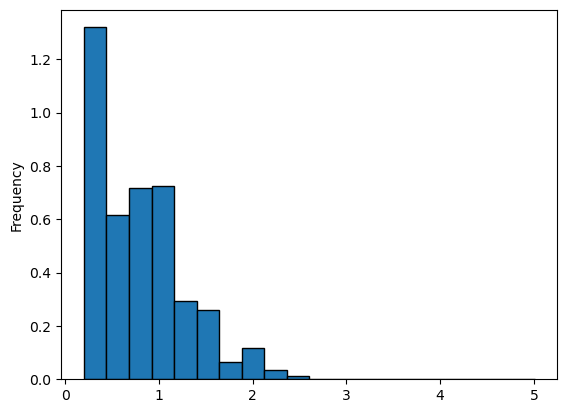

In [8]:
df_train['carat'].plot.hist(edgecolor='black', bins=20, density=True)

In [9]:
df_train.info()

<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   43152 non-null  float32
 1   carat   43152 non-null  float32
 2   depth   43152 non-null  float32
 3   table   43152 non-null  float32
 4   x       43152 non-null  float32
 5   y       43152 non-null  float32
 6   z       43152 non-null  float32
dtypes: float32(7)
memory usage: 1.2 MB


<Axes: title={'center': 'Столбчатая диаграмма признака y'}>

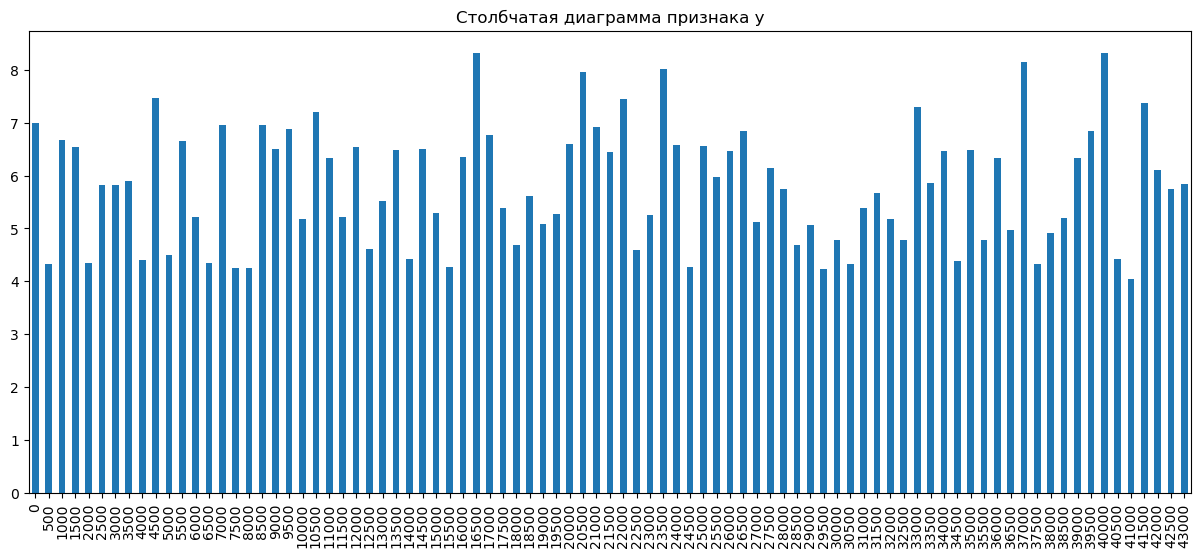

In [10]:
df_train[::500]['y'].plot.bar(title='Столбчатая диаграмма признака y', figsize=(15,6)) # шаг 500

3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их. 

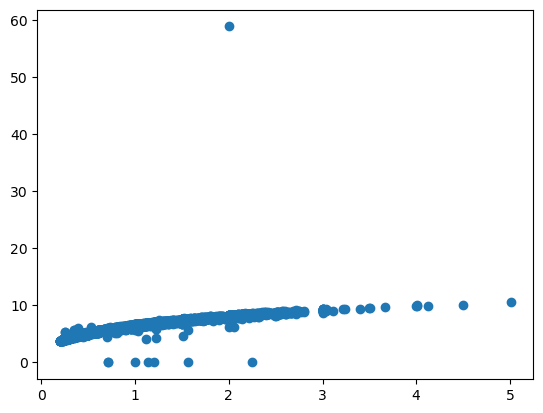

In [11]:
plt.scatter(df_train.carat,df_train.y)

In [12]:
np.max(df_train.y)

58.900001525878906

In [13]:
y_train1 = df_train.y[(df_train.y>0.0) & (df_train.y<58.0)]
carat_train1 = df_train.carat[(df_train.y>0.0) & (df_train.y<58.0)]
y_train = np.array(y_train1)
carat_train = np.array(carat_train1)
y_train.shape, carat_train.shape, type(y_train), type(carat_train)


((43144,), (43144,), numpy.ndarray, numpy.ndarray)

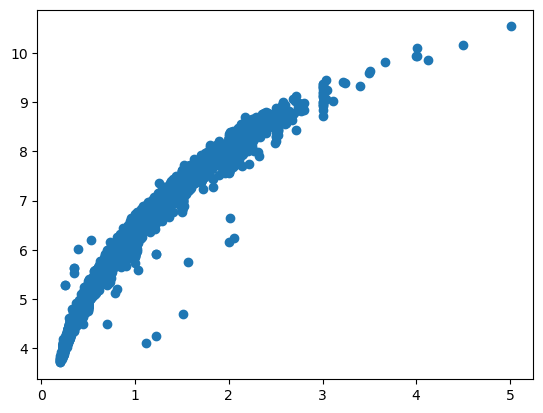

In [14]:
plt.scatter(carat_train,y_train)

4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества R^2 (коэффициенту детерминации). 

Точный подход:

In [15]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [16]:
reg = SimpleLinReg()
reg.fit(carat_train,y_train)

SimpleLinearReg()

In [17]:
reg.a_, reg.b_

(2.2878778, 3.9087768)

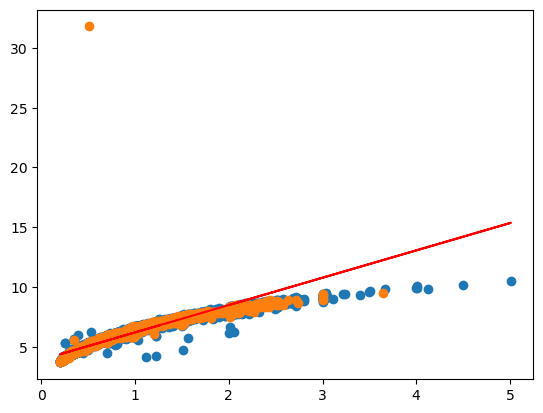

In [19]:
plt.scatter(carat_train, y_train) #blue
plt.scatter(carat_test, y_test) #orange
plt.plot(carat_train, reg.predict(carat_train), color='r')

In [23]:
y_predict = reg.predict(carat_test)
y_predict.shape

(10788,)

In [22]:
r2_score(y_train, y_predict)

ValueError: Found input variables with inconsistent numbers of samples: [43144, 10788]

Нейронная сеть с одним нейроном:

In [119]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [120]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )

c:\Users\anast\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

In [124]:
model.fit(carat_train, y_train, epochs=100)

Epoch 1/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3383 - mean_absolute_error: 0.3383
Epoch 2/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1873 - mean_absolute_error: 0.1873
Epoch 3/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1913 - mean_absolute_error: 0.1913
Epoch 4/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1885 - mean_absolute_error: 0.1885
Epoch 5/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1877 - mean_absolute_error: 0.1877
Epoch 6/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1940 - mean_absolute_error: 0.1940
Epoch 7/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1889 - mean_absolute_error: 0.1889
Epoch 8/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1873 - mean_absolute_error: 0.1873
Epoch 9/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1887 - mean_absolute_error: 0.1887
Epoch 10/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1863 - mean_absolute_error: 0.1863

In [129]:
y_predict2 = model.predict(carat_test)
y_predict2

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


array([[6.5520477],
       [5.6831927],
       [4.640567 ],
       ...,
       [4.640567 ],
       [4.7895136],
       [5.633544 ]], dtype=float32)

In [141]:
carat_test.shape, y_predict[::4].shape, y_predict2.shape

((10788,), (10786,), (10788, 1))

ValueError: x and y must have same first dimension, but have shapes (10788,) and (8629,)

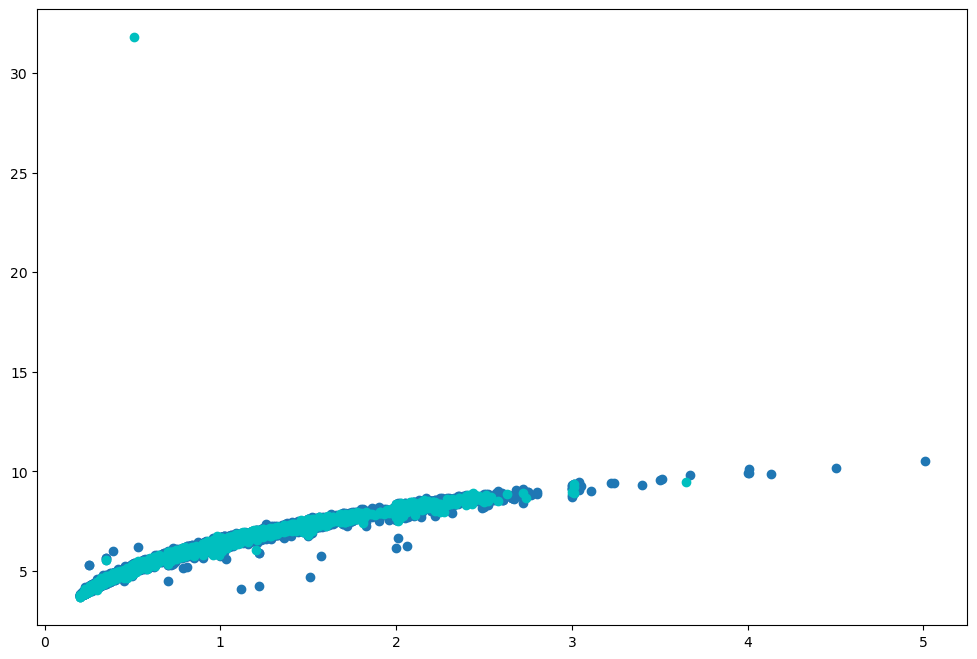

In [139]:
plt.figure(figsize=(12,8))
plt.scatter(carat_train, y_train)
plt.scatter(carat_test, y_test, c='c')
plt.plot(carat_test, y_predict[::5], c='m', label='точная линия регрессии')
plt.plot(carat_test, y_predict2, c='r', label='линия регрессии (ANN)')
plt.legend();